Simple CNN model for CIFAR-*10*  





In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import matplotlib.pyplot as plt

Fix random seed for reproducibility and load the data

In [ ]:
seed = 7
np.random.seed(seed)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


Normalize inputs from 0-255 to 0.0-1.0

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

One hot encode outputs

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

Create the model

In [ ]:
# Create the model
model = Sequential()
#Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
#Dropout layer at 20%.
model.add(Dropout(0.2))
#Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
#Max Pool layer with size 2×2.
model.add(MaxPooling2D(pool_size=(2, 2)))
#Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
#Dropout layer at 20%.
model.add(Dropout(0.2))
#Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
#Max Pool layer with size 2×2.
model.add(MaxPooling2D(pool_size=(2, 2)))
#Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
#Dropout layer at 20%.
model.add(Dropout(0.2))
#Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
#Max Pool layer with size 2×2.
model.add(MaxPooling2D(pool_size=(2, 2)))
#Flatten layer.
model.add(Flatten())
#Dropout layer at 20%.
model.add(Dropout(0.2))
#Fully connected layer with 1024 units and a rectifier activation function.
model.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
#Dropout layer at 20%.
model.add(Dropout(0.2))
#Fully connected layer with 512 units and a rectifier activation function.
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
#Dropout layer at 20%.
model.add(Dropout(0.2))
#Fully connected output layer with 10 units and a Softmax activation function
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile Model

In [ ]:
epochs = 5
lrate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate=lrate,
    decay_steps=epochs * len(X_train) // 32,
    decay_rate=0.1
)
sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,915,114 (11.12 MB)

 Trainable params: 2,915,114 (11.12 MB)

 Non-trainable params: 0 (0.00 B)

None


Fit the model

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)



Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 480s 305ms/step - accuracy: 0.1630 - loss: 2.2028 - val_accuracy: 0.3422 - val_loss: 1.8001
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 516s 314ms/step - accuracy: 0.4155 - loss: 1.5948 - val_accuracy: 0.4917 - val_loss: 1.3911
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 488s 305ms/step - accuracy: 0.5175 - loss: 1.3304 - val_accuracy: 0.5573 - val_loss: 1.2219
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 472s 302ms/step - accuracy: 0.5666 - loss: 1.1897 - val_accuracy: 0.5919 - val_loss: 1.1353
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 476s 305ms/step - accuracy: 0.6091 - loss: 1.0826 - val_accuracy: 0.6285 - val_loss: 1.0336
Accuracy: 62.85%


Final evaluation of the model

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

2. Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4
images to check whether or not the model has predicted correctly.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Predicted classes:  [3 8 8 0]
Actual classes:  [3 8 8 0]


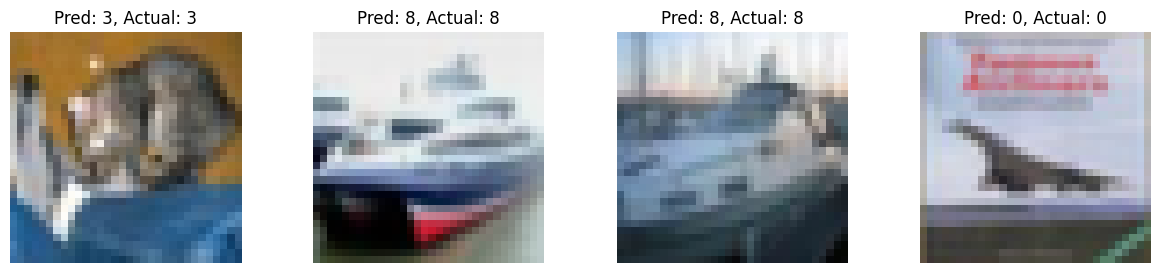

In [ ]:
# Predict the first 4 images of the test data
predictions = model.predict(X_test[:4])
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test[:4], axis=1)

# Print the predictions and actual labels
print("Predicted classes: ", predicted_classes)
print("Actual classes: ", actual_classes)

# Plot the first 4 test images, predicted labels, and actual labels
fig, axes = plt.subplots(1, 4, figsize=(15, 3))
for i in range(4):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Pred: {predicted_classes[i]}, Actual: {actual_classes[i]}")
    axes[i].axis('off')
plt.show()

3. Visualize Loss and Accuracy using the history object

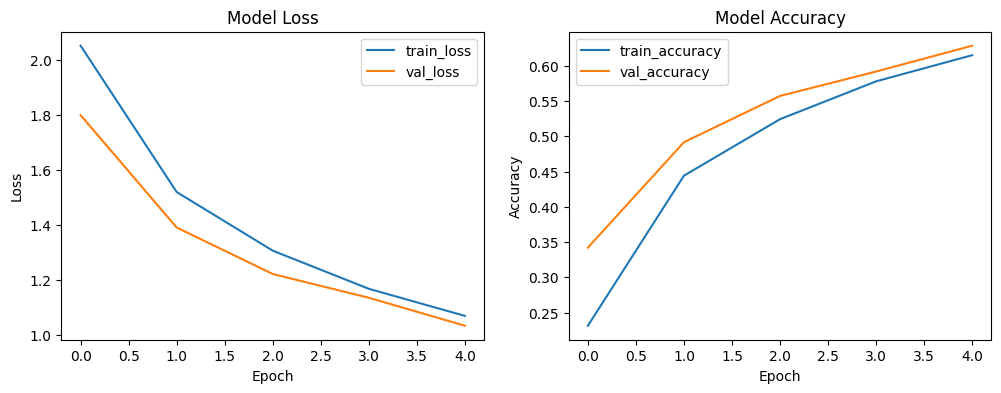

In [ ]:

# Visualize Loss and Accuracy
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()